# Titanic_Case_Study

In [7]:
#Import Necessary Liabraries for predection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
#Import Dataset from CSV to pandas dataframe.

In [9]:
data_titanic = pd.read_csv(r"D:\machine learning\train.csv")
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#to check shape of data(in terms of rows & columns)

In [11]:
data_titanic.shape

(891, 12)

In [12]:
#checking information from data

In [13]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#checking null values

In [15]:
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
## In "Age" variable 177 is null values
## & in "Cabin" column there are 687 null values
## so dropping "Cabin" column. (50% & above Null)


In [17]:
data_titanic = data_titanic.drop(columns="Cabin", axis=1)

In [18]:
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [19]:
## "Cabin" column is removed.

In [20]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
## now replacing missing values in "age" with mean value

In [22]:
data_titanic["Age"].fillna(data_titanic["Age"].mean(), inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_126196\3256771199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_titanic["Age"].fillna(data_titanic["Age"].mean(), inplace=True)


In [23]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
##working on 3rd missing value column "Embarked" 
## as we know in embarked column there is no interger value so cannot go for mean, hence using mode.

In [25]:
##finding the mode value of embarked column

In [26]:
print(data_titanic["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [27]:
print(data_titanic["Embarked"].mode()[0])

S


In [28]:
data_titanic["Embarked"].fillna(data_titanic["Embarked"].mode()[0], inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_126196\595261584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_titanic["Embarked"].fillna(data_titanic["Embarked"].mode()[0], inplace=True)


In [29]:
data_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Exploratory Data Analysis

In [30]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
data_titanic["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 1 Data Visualisation

In [32]:
##checking for survived & non survived cases with countplot

In [33]:
sns.set()

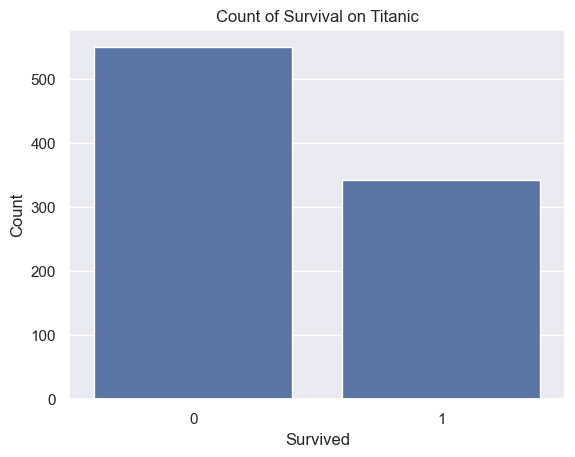

TypeError: countplot() got multiple values for argument 'data'

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_titanic is your DataFrame containing the 'Survived' column
sns.countplot(x='Survived', data=data_titanic)
plt.title('Count of Survival on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
sns.countplot('Survived', data=data_titanic)

In [38]:
##no of survivors as per gender

In [39]:
sns.countplot('Sex', data=data_titanic)

TypeError: countplot() got multiple values for argument 'data'

In [ ]:
##comparing data of survivors with gender

In [40]:
sns.countplot('Sex', hue="Survived", data=data_titanic)

TypeError: countplot() got multiple values for argument 'data'

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

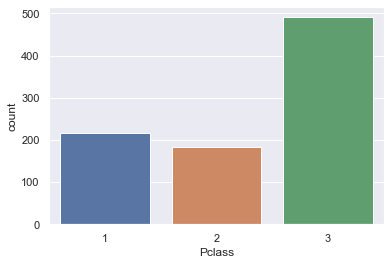

In [ ]:
# cheking countplot for "Pclass" column
sns.countplot('Pclass', data=data_titanic)

In [ ]:
##comparing Survived (Class wise)

In [ ]:
##many people were travelling in 3rd class(lOWER) in Titanic.

In [ ]:
# now cheking countplot for "Embarked" column
# checking how many people started their journey from various locations.

In [41]:
sns.countplot('Embarked', data=data_titanic)

TypeError: countplot() got multiple values for argument 'data'

In [ ]:
## most of the people have started their journey from Southampton (S).

#### Checking numerical attributes

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

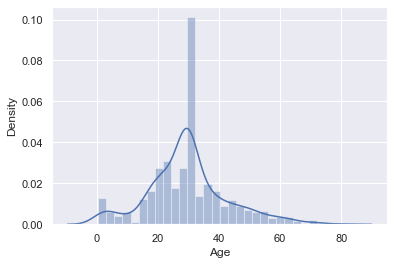

In [ ]:
sns.distplot(data_titanic['Age'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

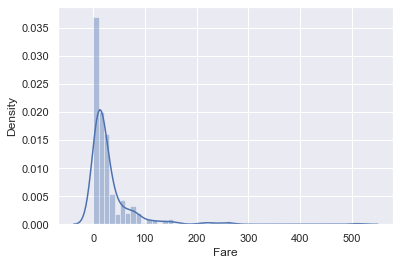

In [ ]:
#checking for Fare column
sns.distplot(data_titanic['Fare'])

### HeatMap to check correlation

In [42]:
corr = data_titanic.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [43]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
## drop unnecessary columns
data_titanic = data_titanic.drop(columns=['Name', 'Ticket'], axis=1)
data_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Encoding Label

In [45]:
#Categorical to Numerical for further modelling

In [46]:
data_titanic["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [47]:
data_titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    data_titanic[col] = le.fit_transform(data_titanic[col])
data_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Train_Test_Split

In [51]:
X = data_titanic.drop(columns = ['PassengerId','Survived'],axis=1)
Y = data_titanic['Survived']

In [52]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [53]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [54]:
##Splitting the data into training data & Test data.


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


### Model Training

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
model = LogisticRegression()

In [59]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [60]:
data_titanic.astype({'Age':'int','Fare':'int'}).dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int32
Age            int32
SibSp          int64
Parch          int64
Fare           int32
Embarked       int32
dtype: object

In [61]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [62]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [63]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [64]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  0.8132022471910112


In [65]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [66]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [82]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming Y_test are your true labels and X_test_prediction are your predicted labels
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Create a DataFrame to hold the accuracy score
accuracy_df = pd.DataFrame({
    'Accuracy_Score': [test_data_accuracy]
})

# Save the DataFrame to a CSV file
accuracy_df.to_csv('accuracy_score.csv', index=False)

print('Accuracy score of test data:', test_data_accuracy)


Accuracy score of test data: 0.7877094972067039


In [86]:
test_data_accuracy = pd.read_csv("D:\machine learning/gender_submission.csv")
test_data_accuracy

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
test_data_accuracy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [88]:
test_data_accuracy.to_csv("Submission1.csv", index=False)